In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\Users\chojk\Desktop\myproject\SleepHealtLifestyleDatasetPredictiveModelling\Sleep_health_and_lifestyle_dataset.csv")

# Devide 'Blood Pressure' column into HighBP and LowBP
df[['HighBP', 'LowBP']] = df['Blood Pressure'].str.split('/', expand=True)
df = df.drop(columns=['Blood Pressure'])

# Convert "Normal Weight" to "Normal" in the 'BMI Category' column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

# Convert both 'HighBP' and 'LowBP' to integers
df['HighBP'] = pd.to_numeric(df['HighBP'], errors='coerce', downcast='integer')
df['LowBP'] = pd.to_numeric(df['LowBP'], errors='coerce', downcast='integer')


In [6]:
# =========================
# 1. Data Overview
# =========================
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
0         51    Male   32   Engineer             7.5                 8   
1         52    Male   32   Engineer             7.5                 8   
2        299  Female   51   Engineer             8.5                 9   
3        300  Female   51   Engineer             8.5                 9   
4        301  Female   51   Engineer             8.5                 9   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       45             3       Normal          70   
1                       45             3       Normal          70   
2                       30             3       Normal          65   
3                       30             3       Normal          65   
4                       30             3       Normal          65   

   Daily Steps Sleep Disorder  HighBP  LowBP  
0         8000            NaN     120     80  
1         8000   


Missing Values Count:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
HighBP                       0
LowBP                        0
dtype: int64


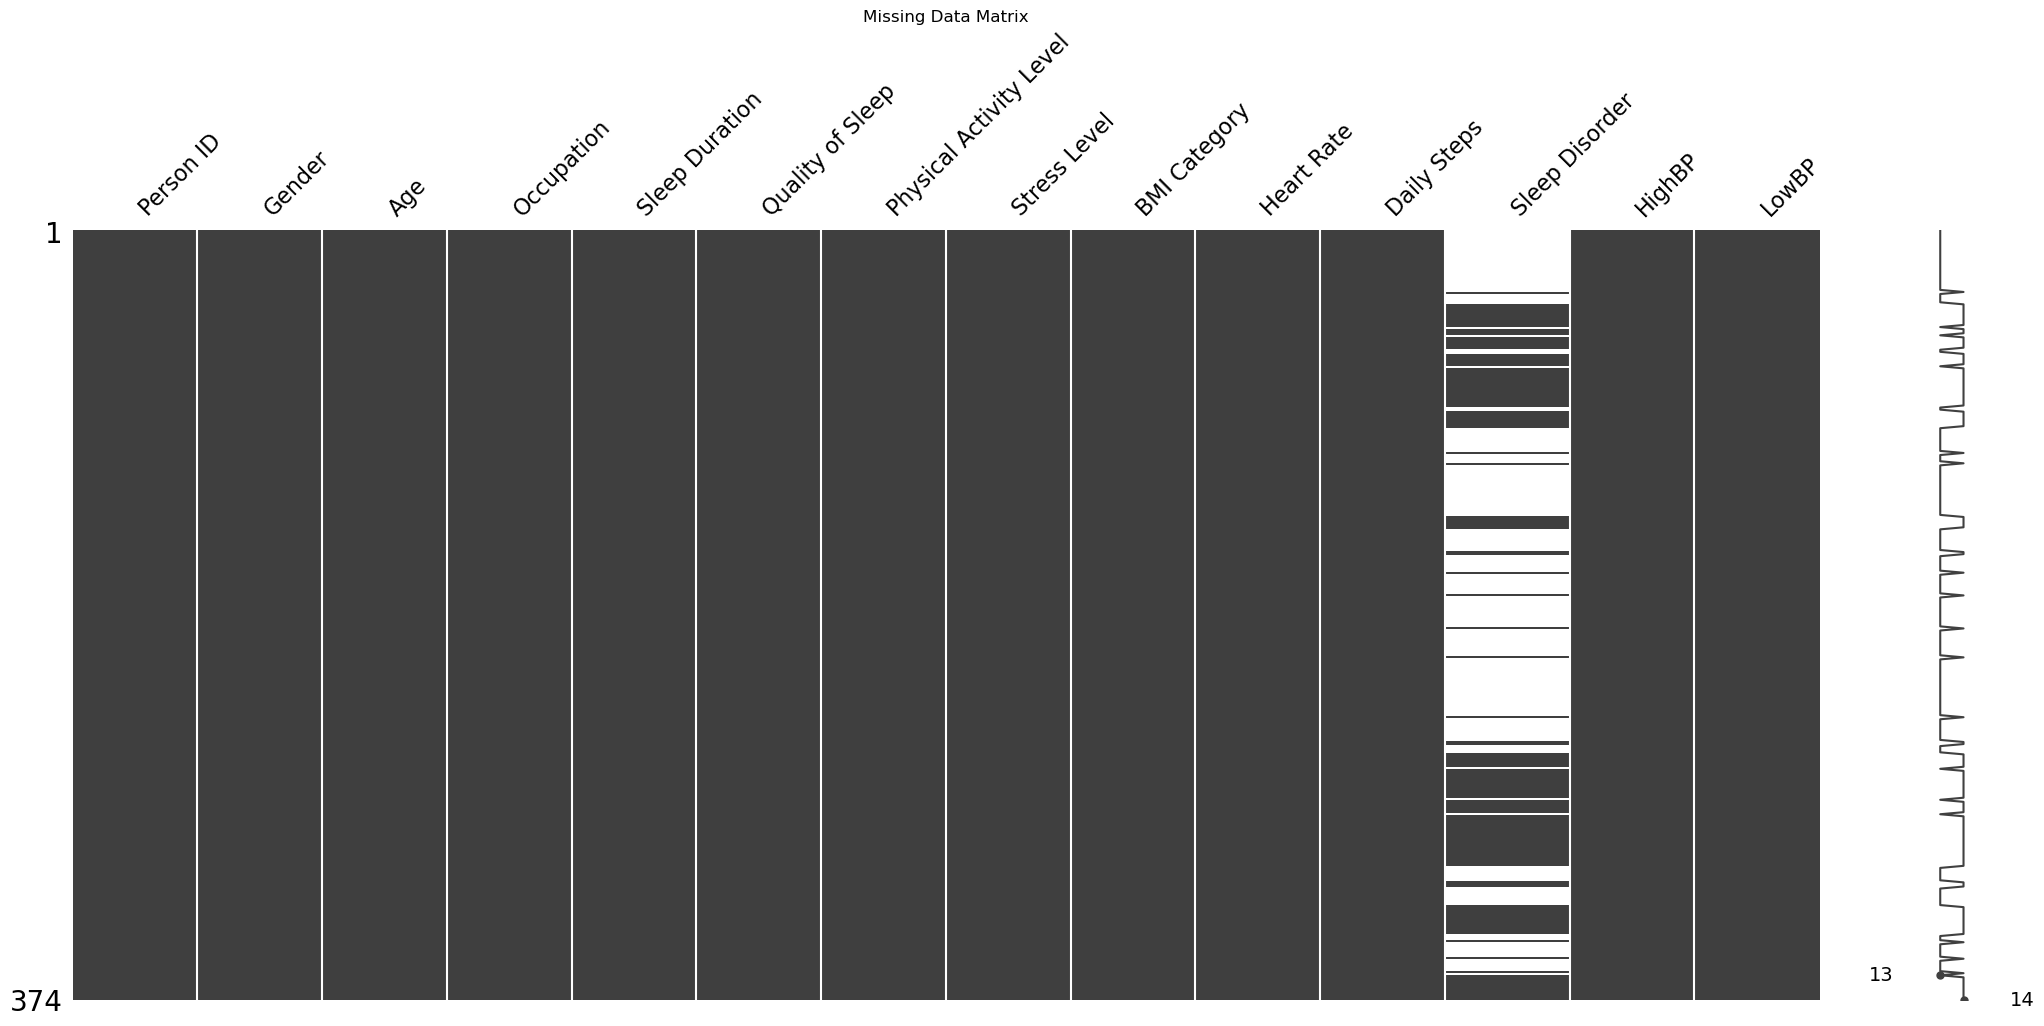

In [7]:
# =========================
# 2. Check for Missing Values
# =========================
print("\nMissing Values Count:")
print(df.isnull().sum())

# Visualize missing data
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()



Exploring Numerical Features:


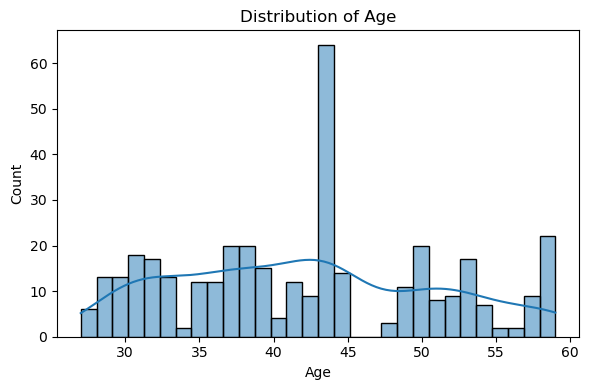

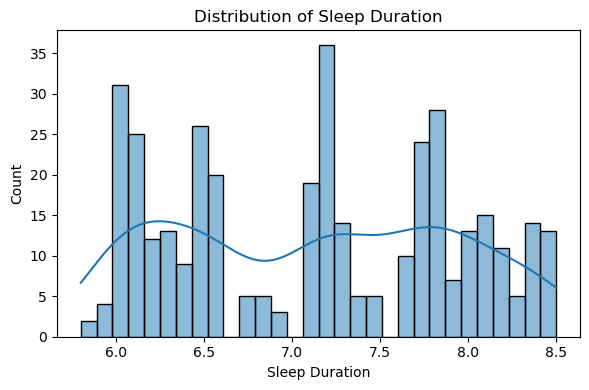

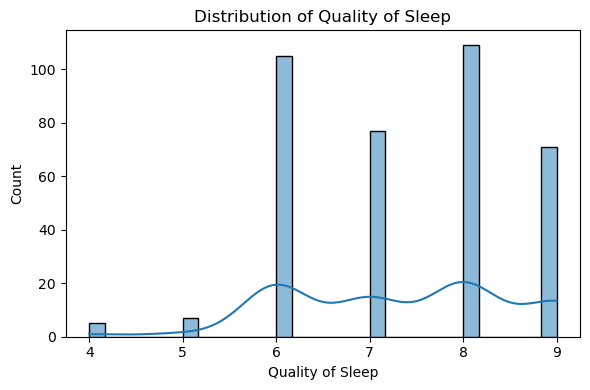

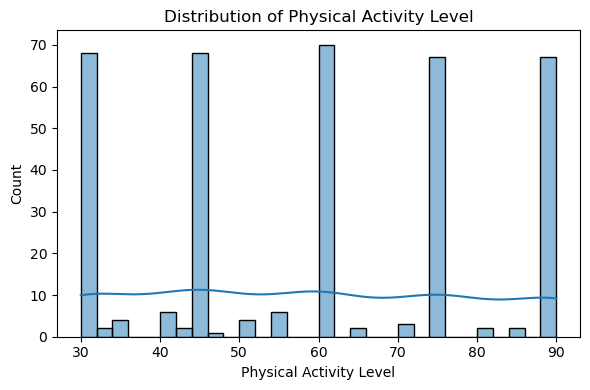

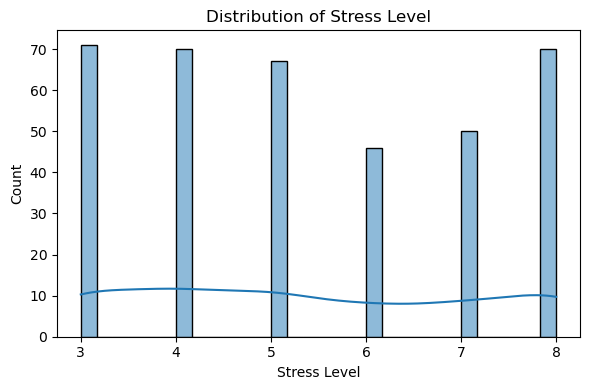

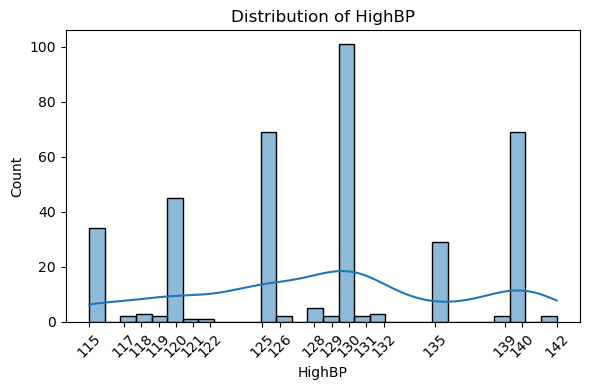

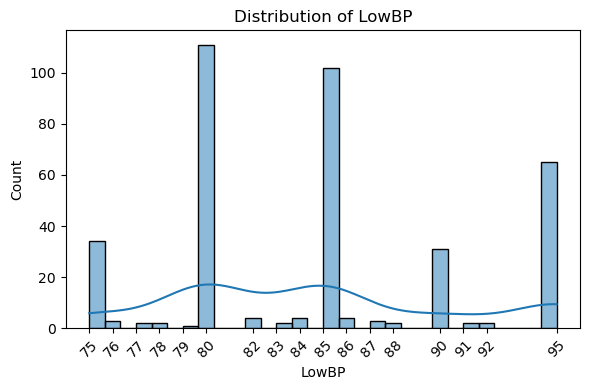

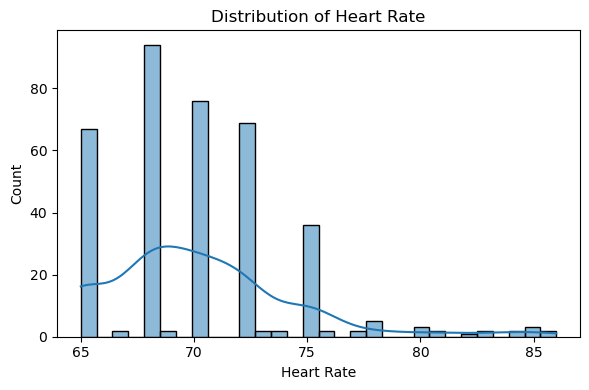

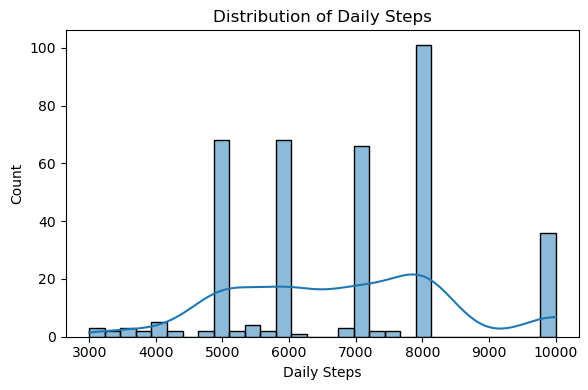

In [8]:
# =========================
# 3. Explore Feature Distributions
# =========================
# Numerical columns
numerical_cols = [
    'Age', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level',
    'HighBP', 'LowBP', 'Heart Rate', 'Daily Steps'
]

print("\nExploring Numerical Features:")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    
    # Plot the histogram
    sns.histplot(data=df, x=col, kde=True, bins=30)
    
    # Adjust the x-axis for HighBP and LowBP
    if col in ['HighBP', 'LowBP']:
        unique_sorted = sorted(df[col].dropna().unique())  # Get sorted unique values
        plt.xticks(unique_sorted, rotation=45)  # Set sorted x-axis labels
    
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()  # Avoid overlapping x-axis labels
    plt.show()



Correlation Matrix (Numerical Features Only):
                              Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Stress Level            -0.422344       -0.811023         -0.898752   
HighBP                   0.605878       -0.180406         -0.121632   
LowBP                    0.593839       -0.166570         -0.110151   
Heart Rate              -0.225606       -0.516455         -0.659865   
Daily Steps              0.057973       -0.039533          0.016791   

                         Physical Activity Level  Stress Level    HighBP  \
Age                                     0.178993     -0.422344  0.605878   
Sleep Duration                          0.212360     -0.811023 -0.180406   
Quality of Sle

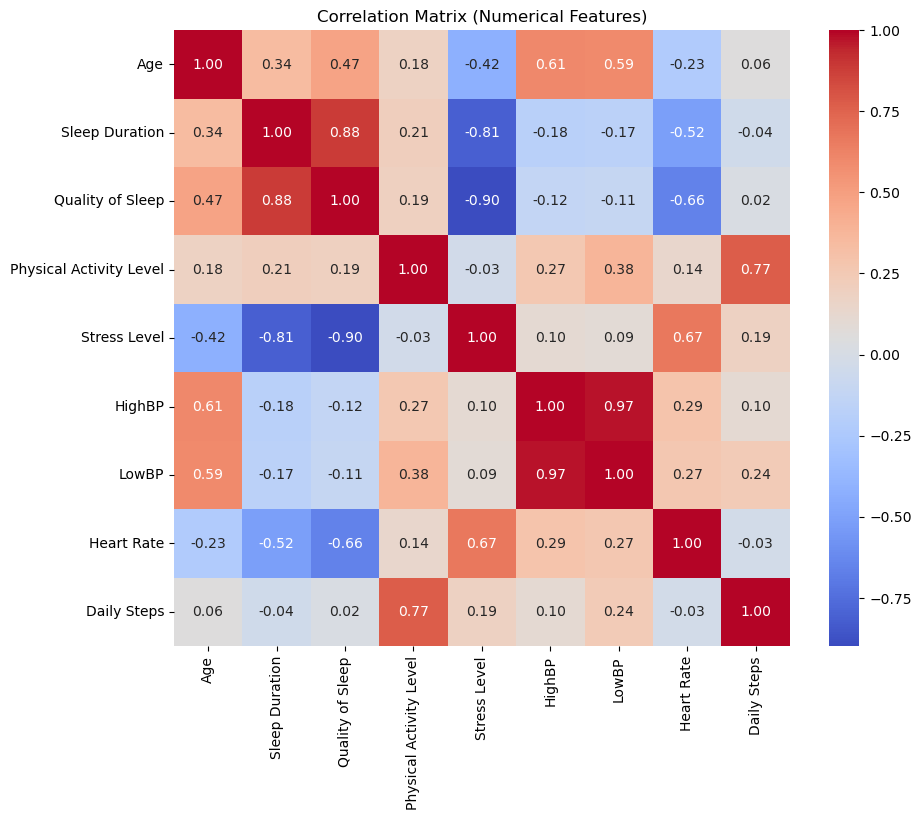


Analyzing Relationships Between Categorical and Numerical Features:


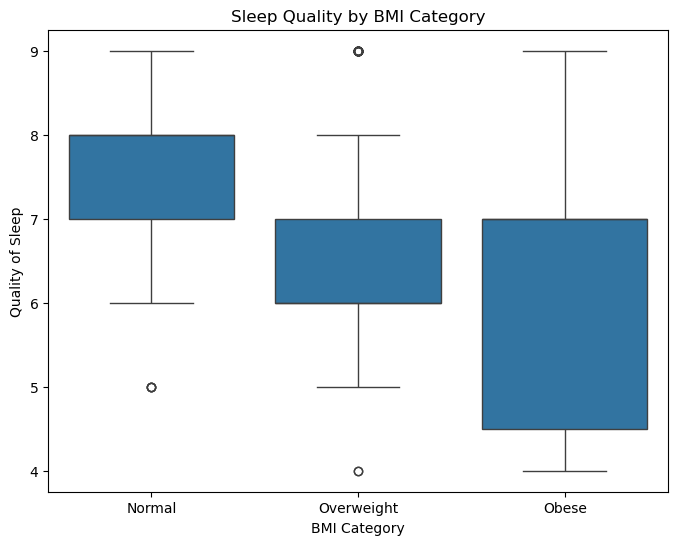


Analyzing Relationships Between Categorical Features:

Crosstab: Gender vs. Sleep Disorder
Sleep Disorder  Insomnia  Sleep Apnea
Gender                               
Female          0.349515     0.650485
Male            0.788462     0.211538


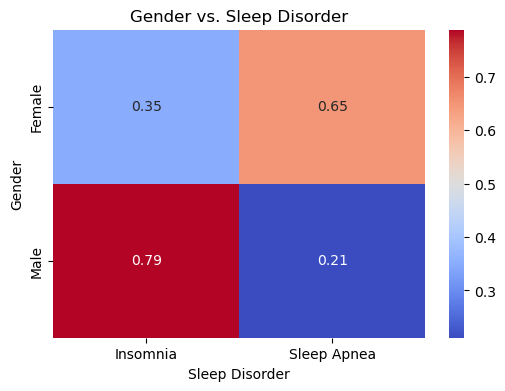

In [9]:
# =========================
# 4. Correlation and Relationships Analysis
# =========================

# Correlation Matrix for Numerical Features
print("\nCorrelation Matrix (Numerical Features Only):")
numerical_cols = [
    'Age', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level',
    'HighBP', 'LowBP', 'Heart Rate', 'Daily Steps'
]
correlation = df[numerical_cols].corr()
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

# Categorical vs. Numerical Relationships
print("\nAnalyzing Relationships Between Categorical and Numerical Features:")

# Sleep Quality by BMI Category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='BMI Category', y='Quality of Sleep')
plt.title("Sleep Quality by BMI Category")
plt.show()

# Categorical vs. Categorical Relationships
print("\nAnalyzing Relationships Between Categorical Features:")

# Crosstab for Gender and Sleep Disorder
crosstab = pd.crosstab(df['Gender'], df['Sleep Disorder'], normalize='index')
print("\nCrosstab: Gender vs. Sleep Disorder")
print(crosstab)

plt.figure(figsize=(6, 4))
sns.heatmap(crosstab, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Gender vs. Sleep Disorder")
plt.show()




Detecting Outliers:


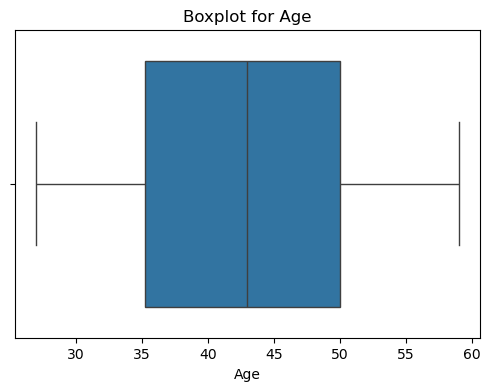

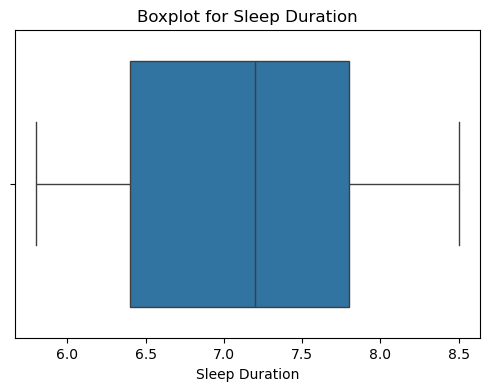

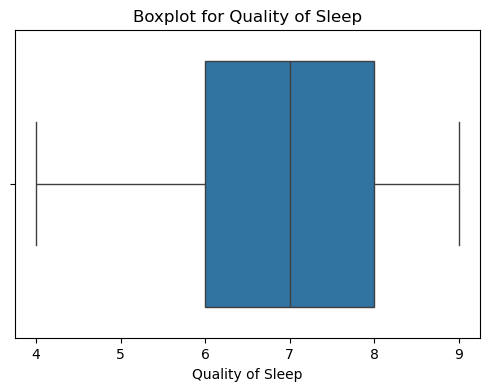

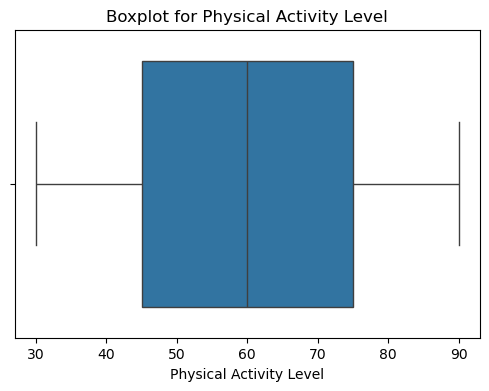

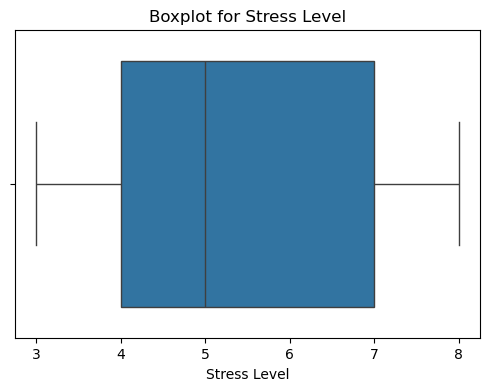

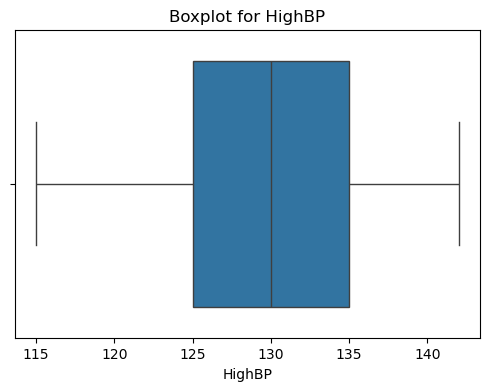

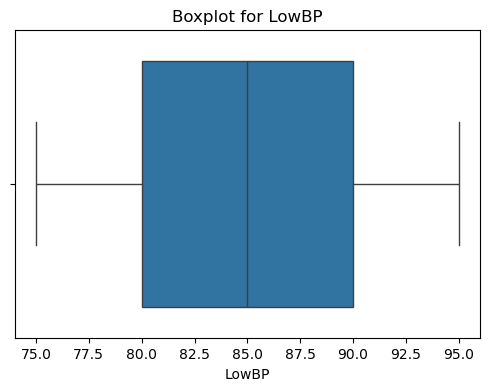

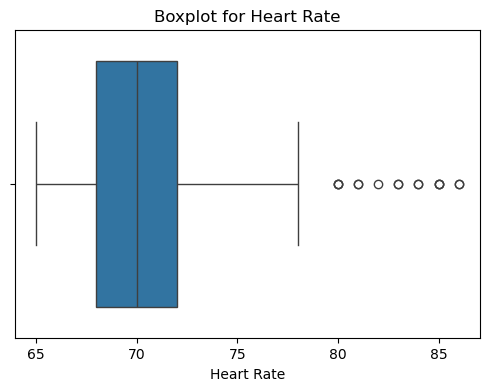

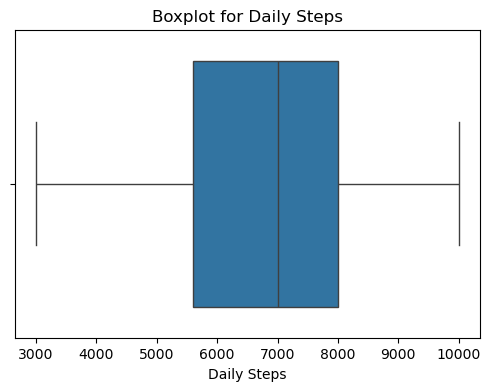

In [10]:
# =========================
# 5. Outlier Detection
# =========================
print("\nDetecting Outliers:")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()